In [8]:
import torch as t
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()   # 可以把Tensor转成Image, 方便可视化
print(t.__version__)
np.__version__

1.8.1+cpu


'1.20.2'

In [7]:
# torch.tensor is similar with numpy.array 
# and also used to create scalar
a = t.tensor([3, 4, 9, 91])
b = t.Tensor(3, 4)
print(a.dtype)
print(b.dtype)
# help(t.tensor)

torch.int64
torch.float32


In [8]:
a = t.rand(3, 4)
print(a)

tensor([[0.9057, 0.5257, 0.8734, 0.4179],
        [0.8198, 0.0669, 0.5627, 0.2569],
        [0.0319, 0.2177, 0.2922, 0.2271]])


In [11]:
print(a.mean())
print(a.mean(axis=1))
print(a.mean(axis=0))

tensor(0.4332)
tensor([0.6807, 0.4265, 0.1922])
tensor([0.5858, 0.2701, 0.5761, 0.3006])


In [12]:
print(a.size())

torch.Size([3, 4])


In [13]:
print(a.shape)

torch.Size([3, 4])


In [19]:
b = t.rand(a.size())
c = t.Tensor(a.size())  # 预先分配空间
t.add(a, b, out=c)
print((a + b) == a.add(b))
print(c)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])
tensor([[1.4453, 1.1367, 1.3591, 0.9531],
        [1.5958, 0.7314, 1.3608, 0.5872],
        [0.5764, 1.1687, 1.0368, 0.2977]])


In [20]:
print(b)

print(b.add(a))
print(b)

print(b.add_(a))
print(b)

tensor([[0.5396, 0.6110, 0.4857, 0.5352],
        [0.7760, 0.6645, 0.7982, 0.3303],
        [0.5445, 0.9510, 0.7446, 0.0705]])
tensor([[1.4453, 1.1367, 1.3591, 0.9531],
        [1.5958, 0.7314, 1.3608, 0.5872],
        [0.5764, 1.1687, 1.0368, 0.2977]])
tensor([[0.5396, 0.6110, 0.4857, 0.5352],
        [0.7760, 0.6645, 0.7982, 0.3303],
        [0.5445, 0.9510, 0.7446, 0.0705]])
tensor([[1.4453, 1.1367, 1.3591, 0.9531],
        [1.5958, 0.7314, 1.3608, 0.5872],
        [0.5764, 1.1687, 1.0368, 0.2977]])
tensor([[1.4453, 1.1367, 1.3591, 0.9531],
        [1.5958, 0.7314, 1.3608, 0.5872],
        [0.5764, 1.1687, 1.0368, 0.2977]])


注意，函数名后面带下划线**`_`** 的函数会修改Tensor本身。例如，`x.add_(y)`和`x.t_()`会改变 `x`，但`x.add(y)`和`x.t()`返回一个新的Tensor， 而`x`不变。

In [21]:
print(a)
print(a[:, 1])

tensor([[0.9057, 0.5257, 0.8734, 0.4179],
        [0.8198, 0.0669, 0.5627, 0.2569],
        [0.0319, 0.2177, 0.2922, 0.2271]])
tensor([0.5257, 0.0669, 0.2177])


## 经过这么多操作可以发现，实际上我们的tensor和numpy的数组是如此相像
## 所以大致熟悉一下就可，不需要多浪费自己的时间

In [22]:
c = t.ones(3, 4)
c

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [25]:
print(c.dtype)  # Tensor -> Numpy
print(c.numpy().dtype)

torch.float32
float32


In [29]:
c = np.ones(8)
b = t.from_numpy(c)
print(b, '\n', c)

tensor([1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64) 
 [1. 1. 1. 1. 1. 1. 1. 1.]


*请注意我们的Tensor与numpy共享内存，所以转换非常快，而且几乎不消耗  任何资源，但是这也意味着其中一个变了另一个一定会变*

In [31]:
b.add_(1)
print(b, '\n', c)

tensor([2., 2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64) 
 [2. 2. 2. 2. 2. 2. 2. 2.]


In [33]:
print(c[3], b[3])
# 可以看出一个输出是数字，另一个的输出却是Tensor

2.0 tensor(2., dtype=torch.float64)


如果你想获取某一个元素的值，可以使用`scalar.item`。 直接`tensor[idx]`得到的还是一个tensor: 一个0-dim 的tensor，一般称为scalar.

In [34]:
scalar = b[3]
scalar

tensor(2., dtype=torch.float64)

In [35]:
scalar.size() # 0-dim

torch.Size([])

In [36]:
scalar.item()

2.0

In [37]:
tensor = t.tensor([2])  # 注意和scalar区别
tensor, scalar

(tensor([2]), tensor(2., dtype=torch.float64))

In [38]:
tensor.size(), scalar.size()

(torch.Size([1]), torch.Size([]))

In [39]:
tensor.item(), scalar.item()

(2, 2.0)

In [40]:
old_tensor = tensor
new_tensor = tensor.clone()
new_tensor[0] = 1111
old_tensor, new_tensor

(tensor([2]), tensor([1111]))

In [41]:
tensor_detach = tensor.detach()
tensor_detach[0] = 333
tensor_detach, tensor

(tensor([333]), tensor([333]))

需要注意的是，`t.tensor()`或者`tensor.clone()`总是会进行数据拷贝，新tensor和原来的数据不再共享内存。所以如果你想共享内存的话，建议使用`torch.from_numpy()`或者`tensor.detach()`来新建一个tensor, 二者共享内存。

In [44]:
# 在不支持GPU的情况下，下一步还是在CPU上运行
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
a = t.rand(8)
b = t.rand(8)
a = a.to(device)
b = b.to(device)
c = a + b
c

tensor([0.8499, 1.0505, 0.7972, 0.7792, 0.9715, 0.9886, 0.3680, 1.1541])


### autograd: 自动微分

深度学习的算法本质上是通过反向传播求导数，而PyTorch的**`autograd`**模块则实现了此功能。在Tensor上的所有操作，autograd都能为它们自动提供微分，避免了手动计算导数的复杂过程。
 
~~`autograd.Variable`是Autograd中的核心类，它简单封装了Tensor，并支持几乎所有Tensor有的操作。Tensor在被封装为Variable之后，可以调用它的`.backward`实现反向传播，自动计算所有梯度~~ ~~Variable的数据结构如图2-6所示。~~


![图2-6:Variable的数据结构](imgs/autograd_Variable.svg)

  *从0.4起, Variable 正式合并入Tensor, Variable 本来实现的自动微分功能，Tensor就能支持。读者还是可以使用Variable(tensor), 但是这个操作其实什么都没做。建议读者以后直接使用tensor*. 
  
  要想使得Tensor使用autograd功能，只需要设置`tensor.requries_grad=True`. 


~~Variable主要包含三个属性。~~
~~- `data`：保存Variable所包含的Tensor~~
~~- `grad`：保存`data`对应的梯度，`grad`也是个Variable，而不是Tensor，它和`data`的形状一样。~~
~~- `grad_fn`：指向一个`Function`对象，这个`Function`用来反向传播计算输入的梯度，具体细节会在下一章讲解。~~

In [45]:
x = t.ones(2, 3, requires_grad=True)
x

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [46]:
y = x.sum()
y

tensor(6., grad_fn=<SumBackward0>)

In [47]:
y.grad_fn

In [48]:
y.backward()

In [49]:
x.grad

tensor([[1., 1., 1.],
        [1., 1., 1.]])

注意：`grad`在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以反向传播之前需把梯度清零。

In [50]:
y.backward()
x.grad

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [34]:
# 以下划线结束的函数是inplace操作，会修改自身的值，就像add_
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [51]:
x.grad.data.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

###  神经网络

Autograd实现了反向传播功能，但是直接用来写深度学习的代码在很多情况下还是稍显复杂，torch.nn是专门为神经网络设计的模块化接口。nn构建于 Autograd之上，可用来定义和运行神经网络。nn.Module是nn中最重要的类，可把它看成是一个网络的封装，包含网络各层定义以及forward方法，调用forward(input)方法，可返回前向传播的结果。下面就以最早的卷积神经网络：LeNet为例，来看看如何用`nn.Module`实现。LeNet的网络结构如图2-7所示。

![图2-7:LeNet网络结构](imgs/nn_lenet.png)

这是一个基础的前向传播(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。

#### 定义网络

定义网络时，需要继承`nn.Module`，并实现它的forward方法，把网络中具有可学习参数的层放在构造函数`__init__`中。如果某一层(如ReLU)不具有可学习的参数，则既可以放在构造函数中，也可以不放，但建议不放在其中，而在forward中使用`nn.functional`代替。

In [3]:
class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        super(Net, self).__init__()


        self.conv1 = nn.Conv2d(1, 6, 5)  
        # 1:输入图片为单通道， 6：输出通道数， 5：（kernelsize）卷积核为5*5
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 卷积 -> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape, '-1'表示自适应
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要在nn.Module的子类中定义了forward函数，backward函数就会自动被实现(利用`autograd`)。在`forward` 函数中可使用任何tensor支持的函数，还可以使用if、for循环、print、log等Python语法，写法和标准的Python写法一致。

网络的可学习参数通过`net.parameters()`返回，`net.named_parameters`可同时返回可学习的参数及名称。

In [4]:
params = list(net.parameters())
print(len(params))
# print(params)

10


In [5]:
# help(nn.Conv2d)
# help(F.max_pool2d)

In [6]:
for name, parameters in net.named_parameters():
    print(name, ':', parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [7]:
input = t.randn(1, 1, 32, 32)
out = net(input)
out.size()

torch.Size([1, 10])

In [8]:
net.zero_grad()  # 所有参数的梯度清零
out.backward(t.ones(1, 10))  # 反向传播

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 `input.unsqueeze(0)`将batch_size设为１。例如 `nn.Conv2d` 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

#### 损失函数

nn实现了神经网络中大多数的损失函数，例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失。

In [9]:
output = net(input)
target = t.arange(0, 10).view(1, 10).float()
criterion = nn.MSELoss()
loss = criterion(output, target)
loss  # loss是一个scalar

tensor(28.9025, grad_fn=<MseLossBackward>)

如果对loss进行反向传播溯源(使用`gradfn`属性)，可看到它的计算图如下：

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```

当调用`loss.backward()`时，该图会动态生成并自动微分，也即会自动计算图中参数(Parameter)的导数。

In [10]:
net.zero_grad()  # 把net中所有可学习的参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias的梯度
tensor([ 0.0607, -0.0403,  0.0083, -0.0405, -0.0233,  0.1098])


In [11]:
# 自己实现以上的神经网络pytorch代码：
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

nnet = NNet()
print(nnet)


NNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [12]:
# help(nn.Conv2d)

In [13]:
out = nnet(input)
print(out.size())

torch.Size([1, 10])


In [14]:
params = nnet.parameters()
print(params)
params = list(params)
print(len(params))

<generator object Module.parameters at 0x000002962D20E3C0>
10


In [15]:
for name, param in nnet.named_parameters():
    print(name, ':', param.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [16]:
nnet.zero_grad()
out.backward(t.ones(1, 10))

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 `input.unsqueeze(0)`将batch_size设为１。例如 `nn.Conv2d` 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

#### 损失函数

nn实现了神经网络中大多数的损失函数，例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失。

In [18]:
output = nnet(input)
target = t.arange(0, 10).view(1, 10).float()
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

tensor(27.9670, grad_fn=<MseLossBackward>)

In [17]:
d = t.arange(0, 10)
print(d, '\n', d.view(1, 10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
 tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])


In [19]:
nnet.zero_grad()
print('反向传播之前 conv1.bias的梯度')
print(nnet.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(nnet.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias的梯度
tensor([-0.1118, -0.0240,  0.0566, -0.0841, -0.0131, -0.0262])


在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和参数，例如随机梯度下降法(SGD)的更新策略如下：
```
weight = weight - learning_rate * gradient
```

手动实现如下：

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)# inplace 减法
```

`torch.optim`中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用，因此大多数时候并不需要手动写上述代码。

In [21]:
optimizer = optim.SGD(net.parameters(), lr = 0.01)

optimizer.zero_grad()

output = nnet(input)
loss = criterion(output, target)

loss.backward

optimizer.step()

In [22]:
output = nnet(input)
loss = criterion(output, target)
loss

tensor(27.9670, grad_fn=<MseLossBackward>)



####  数据加载与预处理

在深度学习中数据加载及预处理是非常复杂繁琐的，但PyTorch提供了一些可极大简化和加快数据处理流程的工具。同时，对于常用的数据集，PyTorch也提供了封装好的接口供用户快速调用，这些数据集主要保存在torchvison中。

`torchvision`实现了常用的图像数据加载功能，例如Imagenet、CIFAR10、MNIST等，以及常用的数据转换操作，这极大地方便了数据加载，并且代码具有可重用性。


### 小试牛刀：CIFAR-10分类

下面我们来尝试实现对CIFAR-10数据集的分类，步骤如下: 

1. 使用torchvision加载并预处理CIFAR-10数据集
2. 定义网络
3. 定义损失函数和优化器
4. 训练网络并更新网络参数
5. 测试网络

####   CIFAR-10数据加载及预处理

CIFAR-10[^3]是一个常用的彩色图片数据集，它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是$3\times32\times32$，也即3-通道彩色图片，分辨率为$32\times32$。

[^3]: http://www.cs.toronto.edu/~kriz/cifar.html

In [4]:
# 第一次运行程序会自动下载CIFAR-10数据集，
# 大概100M，需要花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转为Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # 归一化
])


# 训练集
trainset = tv.datasets.CIFAR10(
    root='/pytorch/Data/',
    train=True,
    download=False,
    transform=transform)

trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2)


# 测试集
testset = tv.datasets.CIFAR10(
    '/pytorch/Data/',
    train=False,
    download=False,
    transform=transform)

testloader = t.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

ship


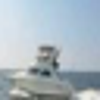

In [5]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

       deer       bird      plane       deer


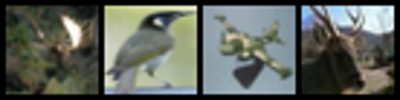

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()  # 返回4张图片及标签
print(''.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400, 100))

####   定义网络

拷贝上面的LeNet网络，修改self.conv1第一个参数为3通道，因CIFAR-10是3通道彩图。

In [9]:
# 自己实现以上的神经网络pytorch代码：
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

nnet = NNet()
print(nnet)


NNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


**定义损失函数和优化器**

In [11]:
optimizer = optim.SGD(nnet.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数

#### 训练网络
所有网络的训练流程都是类似的，不断地执行如下流程：
   * 输入数据
   * 前向传播+反向传播
   * 更新参数

In [12]:
t.set_num_threads(8)
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        # 输入数据
        inputs, labels = data

        # 梯度清零
        optimizer.zero_grad()

        # forward + backward
        outputs = nnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()


        # 更新参数
        optimizer.step()

        # 打印log信息
        # loss是一个scalar, 需要用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d]  loss: %.3f'\
                % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000]  loss: 2.210
[1,  4000]  loss: 1.860
[1,  6000]  loss: 1.661
[1,  8000]  loss: 1.553
[1, 10000]  loss: 1.494
[1, 12000]  loss: 1.459
[2,  2000]  loss: 1.388
[2,  4000]  loss: 1.382
[2,  6000]  loss: 1.333
[2,  8000]  loss: 1.311
[2, 10000]  loss: 1.263
[2, 12000]  loss: 1.262
Finished Training


此处仅训练了2个epoch（遍历完一遍数据集称为一个epoch），来看看网络有没有效果。将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

实际的label:      cat     ship     ship    plane


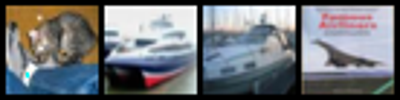

In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()   # 一个batch返回4张照片
print('实际的label:', ' '.join('%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400, 100))

接着计算网络预测的label

In [16]:
# 计算图片在每个类别上的分数
outputs = nnet(images)
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1)

print('预测结果：', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

预测结果：   cat   car   car plane


已经可以看出效果，准确率50%，但这只是一部分的图片，再来看看在整个测试集上的效果。

In [17]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = nnet(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 55 %


训练的准确率远比随机猜测(准确率10%)好，证明网络确实学到了东西。

####  在GPU训练
就像之前把Tensor从CPU转到GPU一样，模型也可以类似地从CPU转到GPU。

In [19]:
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")

nnet.to(device)
images = images.to(device)
labels = labels.to(device)
output = nnet(images)
loss= criterion(output,labels)

loss

tensor(1.7126, grad_fn=<NllLossBackward>)

如果发现在GPU上并没有比CPU提速很多，实际上是因为网络比较小，GPU没有完全发挥自己的真正实力。

对PyTorch的基础介绍至此结束。总结一下，本节主要包含以下内容。

1. Tensor: 类似Numpy数组的数据结构，与Numpy接口类似，可方便地互相转换。
2. autograd/: 为tensor提供自动求导功能。
3. nn: 专门为神经网络设计的接口，提供了很多有用的功能(神经网络层，损失函数，优化器等)。
4. 神经网络训练: 以CIFAR-10分类为例演示了神经网络的训练流程，包括数据加载、网络搭建、训练及测试。

通过本节的学习，相信读者可以体会出PyTorch具有接口简单、使用灵活等特点。从下一章开始，本书将深入系统地讲解PyTorch的各部分知识。